<h1>Data Science Capstone Project Week 2</h1>
<h2>Marcel Enzler</h2><br>
July, 11.07.2019

<h2>Executive Summary</h2><br>
This report is the assignment of data science course on Coursera. The project is about natural language processing. It includes the steps to download the dataset from a website, preliminaray data exploring and analysis. You will find in the report such as word frequency, word cloud included in a mask.
<br><br>
In the first we import some libraries.

In [105]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

Now we get some datas from the website and find all tables.

In [47]:
r = requests.get('https://www.marcel-enzler.ch/biografie.php')

In [48]:
soup = BeautifulSoup(r.text, 'lxml')
table = soup.find_all('table') 
df = pd.read_html(str(table))

I looking for the best table about skills information.

In [49]:
df[8][1]

0     Unter Berücksichtigung von vertraglichen Verei...
1     Technische Prozessoptimierung mit fünf interna...
2     Analyse und Optimierung von Arbeitsabläufen mi...
3     Überarbeitung von mehreren 1000 Grafiken per K...
4     Digitalisierung von Beschaffungsdokumenten und...
5     Entwicklung eines digitalen PM-Tools für die Ü...
6     Evaluation, Beschaffung, Einführung und Schulu...
7                                                   NaN
8     Bearbeitung, Aufdatieren und Aufbereitung von ...
9                                                   NaN
10    Outputs überwachen und Einleitung von Massnahm...
11    Verarbeiten, Aufbereitung und digitales Umwand...
Name: 1, dtype: object

<h2>Data Cleansing and processes</h2>
<br>We will use the data to cleanup. Now i process the table and exclude some words and generate a wordcloud.

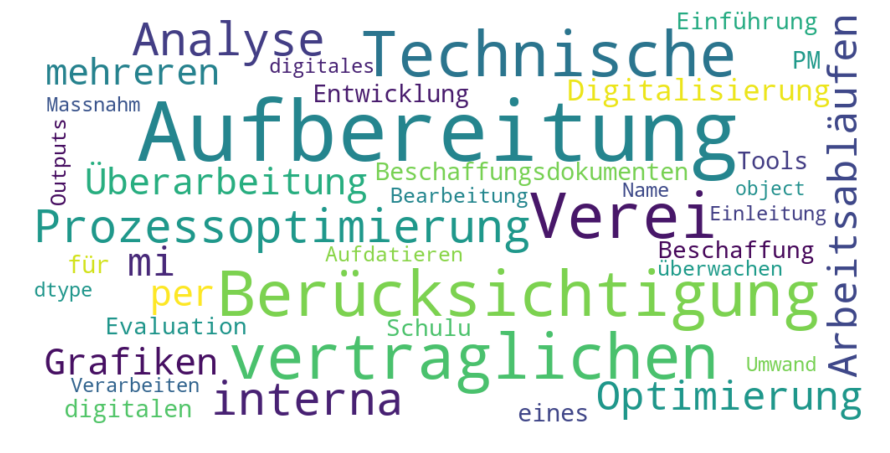

In [126]:
text = str(df[8][1])
stopwords = set(STOPWORDS)
ersetze = ["NaN", "und", "Unter","von","mit","die","fünf"]
 
for x in ersetze: text = text.replace(x, "")

wordcloud = WordCloud(background_color="white", font_step=1, max_font_size=100, width=1000, height=500, 
          stopwords=stopwords,            max_words=310).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
schweiz_mask = np.array(Image.open("schweiz.png"))

Transform the datas recursive to give the parameters for wordcloud.

In [33]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val    

In [34]:
transformed_schweiz_mask = np.ndarray((schweiz_mask.shape[0],schweiz_mask.shape[1]), np.int32)

for i in range(len(schweiz_mask)):
    transformed_schweiz_mask[i] = list(map(transform_format, schweiz_mask[i]))

In [35]:
transformed_schweiz_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

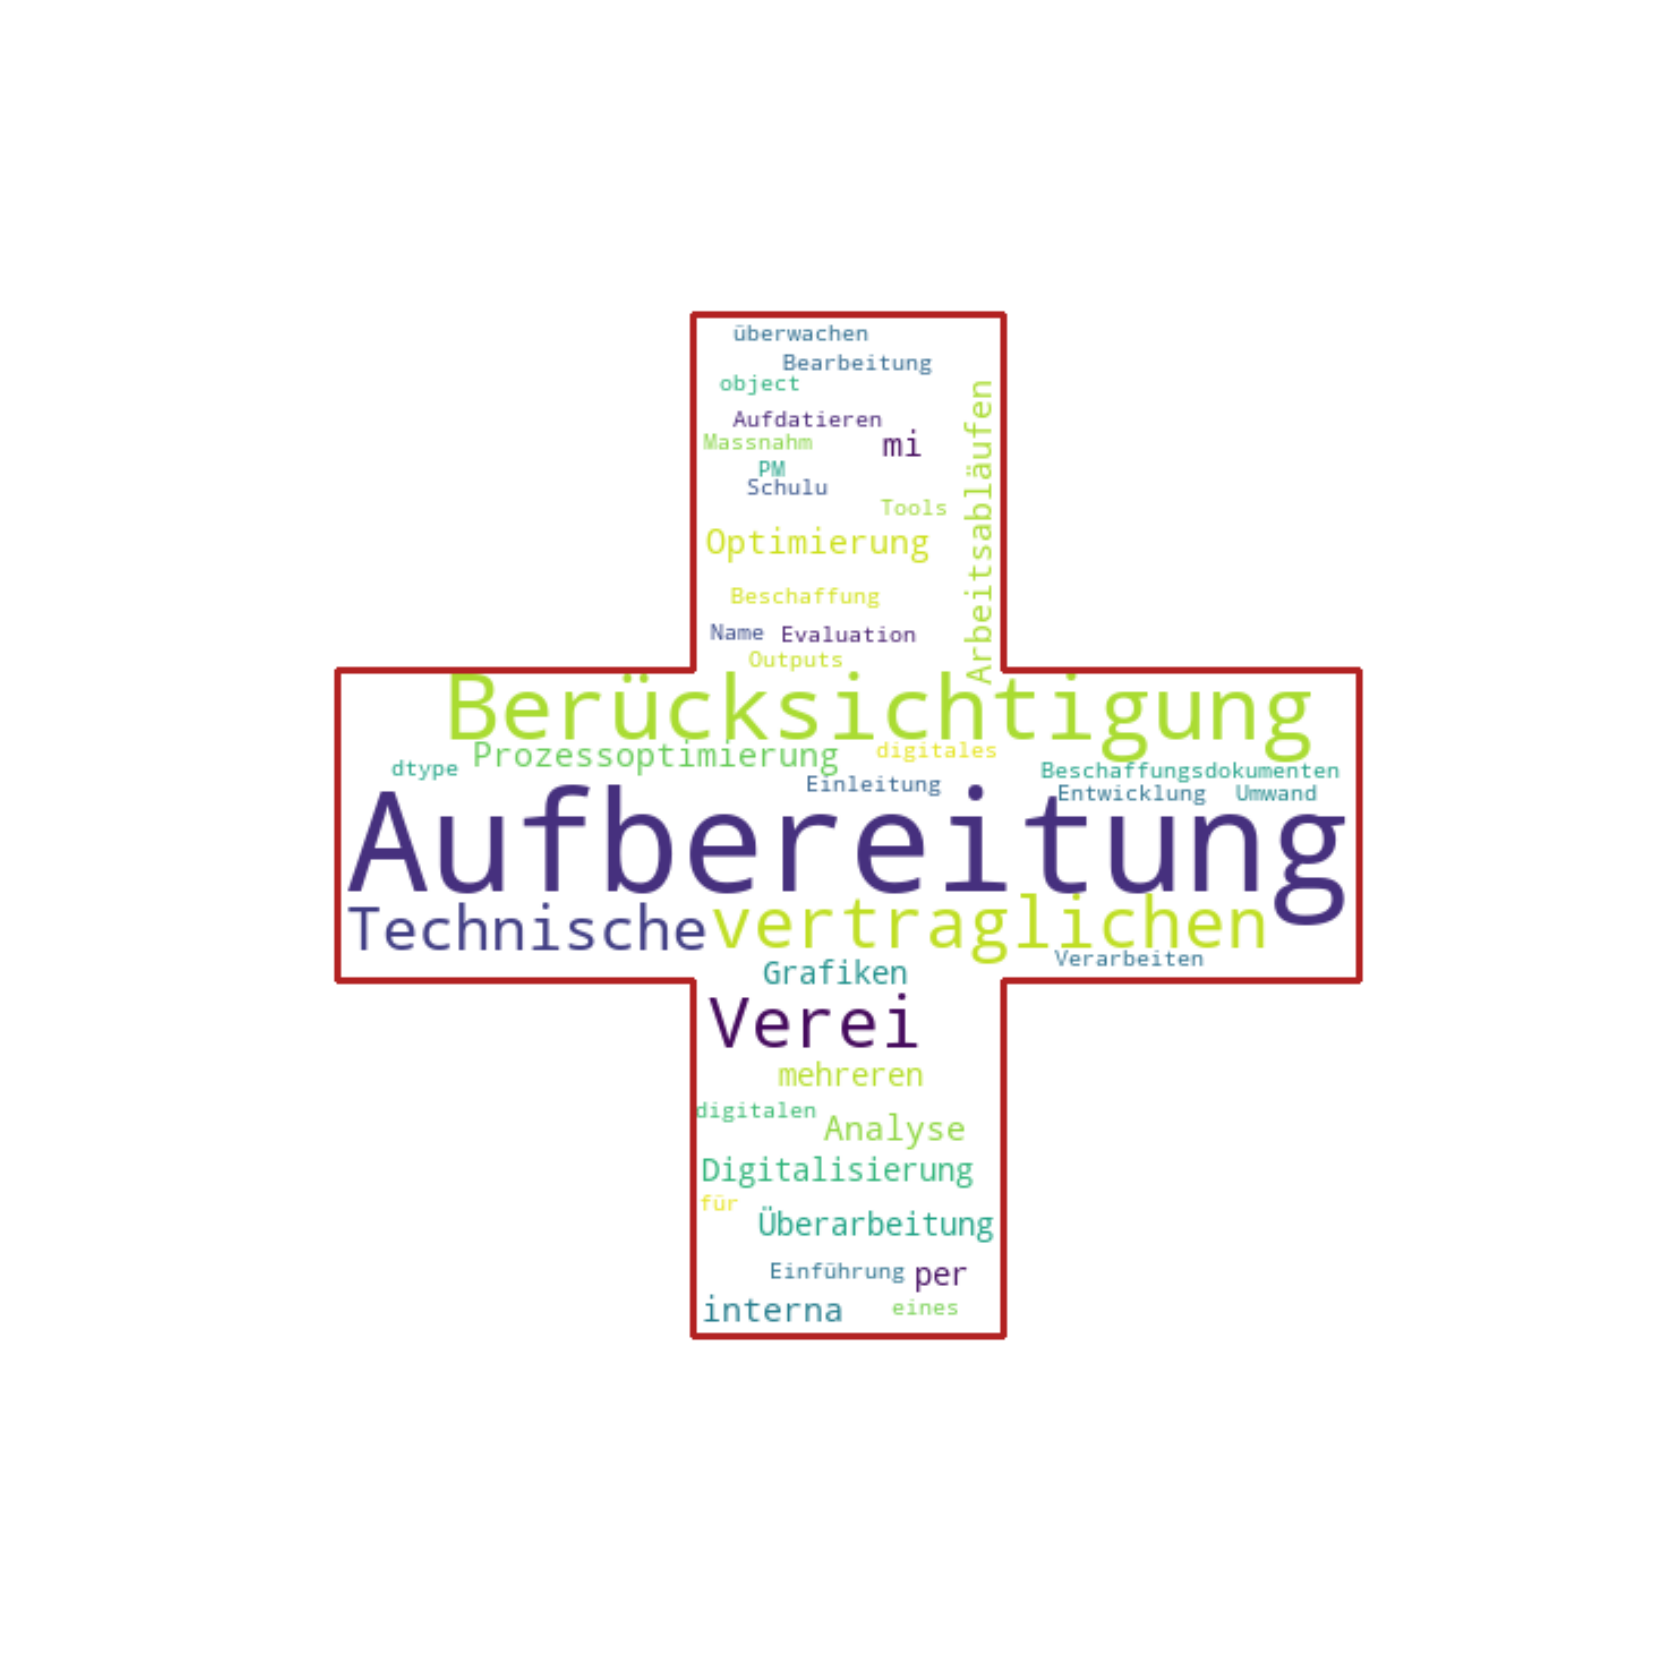

In [36]:
wc = WordCloud(background_color="white", font_step=1, max_font_size=70, width=300, height=300, 
          stopwords=stopwords, mask=transformed_schweiz_mask, contour_width=2,  contour_color='firebrick').generate(text)

wc.generate(text)

plt.figure(figsize=[30,30])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [229]:
extract_data = df[8][1]
extract_data.count()
extract_data = extract_data[1]+ extract_data[2]+extract_data[3]+extract_data[4]+extract_data[5]+extract_data[6]
res = len(extract_data.split())
print ("Count the words in array:" )
res


Count the words in array:


59

In [122]:
print ("Show the data")
extract_data

Show the data


'Technische Prozessoptimierung mit fünf internationalen Unternehmen unter Berücksichtigung vertraglicher BedingungenAnalyse und Optimierung von Arbeitsabläufen mit mehreren UnterauftragnehmernÜberarbeitung von mehreren 1000 Grafiken per Knopfdruck mit einem selbstprogrammierten ToolDigitalisierung von Beschaffungsdokumenten und deren automatisch elektronische Erzeugung und VerteilungEntwicklung eines digitalen PM-Tools für die Überwachung der Kosten und Termine inklusiv deren Statistikfunktion für GL-EbeneEvaluation, Beschaffung, Einführung und Schulung von SW-Tools inkl. Weiterentwicklung'

Let's show the most common words and convert in a list:

In [206]:
from collections import Counter 
from matplotlib.pyplot import figure 
data_set = extract_data  
split_it = data_set.split() 
Counter = Counter(split_it) 
meisten = Counter.most_common(10)   
print(meisten)

[('und', 5), ('von', 4), ('mit', 3), ('mehreren', 2), ('deren', 2), ('für', 2), ('Technische', 1), ('Prozessoptimierung', 1), ('fünf', 1), ('internationalen', 1)]


([<matplotlib.axis.XTick at 0x2559adec198>,
 <a list of 10 Text xticklabel objects>)

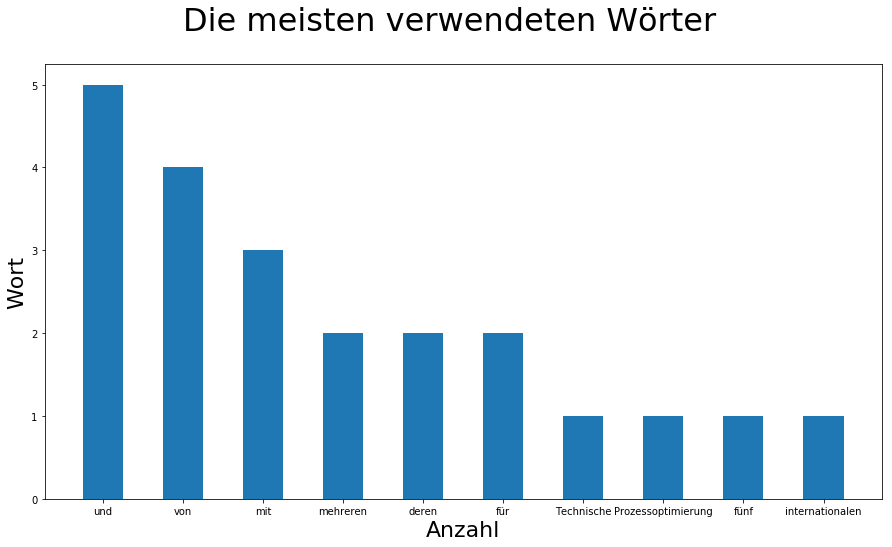

In [231]:
labels, ys = zip(*meisten)
xs = np.arange(len(labels)) 
width = 0.5
fig= plt.figure(figsize=(15,8))
plt.bar(xs, ys, width, align='center')
fig.suptitle('Die meisten verwendeten Wörter', fontsize=32)
plt.xlabel('Anzahl' , fontsize=22)
plt.ylabel('Wort', fontsize=22)
plt.xticks(xs, labels)

<h2>Future Plan</h2><br>
We have extracted some text from the website. For google keyword analyses is the density of keywords important. Next step is improve the keywords on the following:<br>
1. Improve relevant keyword<br>
2. Remove of not relevant words or optimize the text